## Demo for learning dual channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='voxel',channeltype='MF',sysfile='MF')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = '60nm' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 10
L.param.ccd_offset = 2210
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.06 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 
L.param.roi.peak_height = 0.4 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 10 # lower this number if out of memory 
L.param.loss_weight.smooth = 10

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\010_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\002_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\003_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\004_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\005_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\006_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\007_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\008_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\009_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\001_560_60nmStep_99laser.tif
(9, 10, 100, 170, 17

3/6: learning: 94/100 [00:23s]  3.99it/s, current loss: 238.14850, total time: 23.56s 
c:\Users\Sheng\Documents\git\python\PSFLearning\demo\..\psflearning\learning\psfs\PSFVolumeBased_file.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  I_model = I_model.astype(np.float32)
3/6: learning: 73/100 [00:16s]  4.31it/s, current loss: 181.27791, total time: 40.48s
3/6: learning: 118/? [00:27s]  4.30it/s, current loss: 160.10649, total time: 67.91s   
3/6: learning: 89/100 [00:20s]  4.27it/s, current loss: 155.79984, total time: 88.77s
3/6: learning: 100/100 [00:23s]  4.34it/s, current loss: 44.96919, total time: 111.80s
3/6: learning: 83/100 [00:19s]  4.30it/s, current loss: 126.95493, total time: 131.07s
3/6: learning: 88/100 [00:20s]  4.28it/s, current loss: 119.02986, total time: 151.61s 
3/6: learning: 105/? [00:24s]  4.32it/s, current loss: 103.98186, total time: 175.90s   
3/6: learning: 98/100 [00:22s]  4.31it/s, current loss: 135.78131, total time: 

outlier id: [ 6  9 11]
rois shape channel 0: (41, 87, 21, 21)
rois shape channel 1: (41, 87, 21, 21)
rois shape channel 2: (41, 87, 21, 21)
rois shape channel 3: (41, 87, 21, 21)
rois shape channel 4: (41, 87, 21, 21)
rois shape channel 5: (41, 87, 21, 21)
rois shape channel 6: (41, 87, 21, 21)
rois shape channel 7: (41, 87, 21, 21)
rois shape channel 8: (41, 87, 21, 21)


3/6: learning: 23/250 [00:49s]  2.17s/it, current loss: 1231.85522, total time: 516.36s
4/6: calculating spline coefficients: 9/9 [00:29s]  3.32s/it total time: 546.14s
5/6: localization: 10/10 [01:41s] 10.11s/it total time: 647.27s
6/6: saving results: [01:00s] total time: 707.58s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

In [6]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


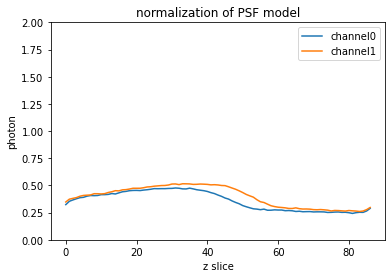

In [7]:
plt.plot(np.sum(f.res.channel0.I_model,axis=(-1,-2)),label='channel0')
plt.plot(np.sum(f.res.channel1.I_model,axis=(-1,-2)),label='channel1')
plt.ylim([0,2])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.legend()
plt.show()

channel 0


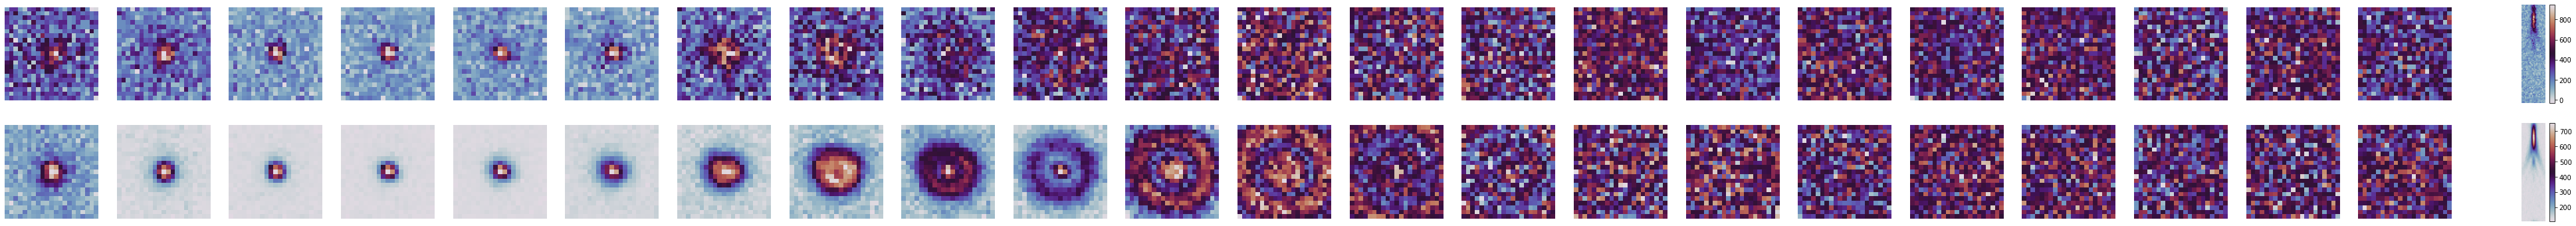

channel 1


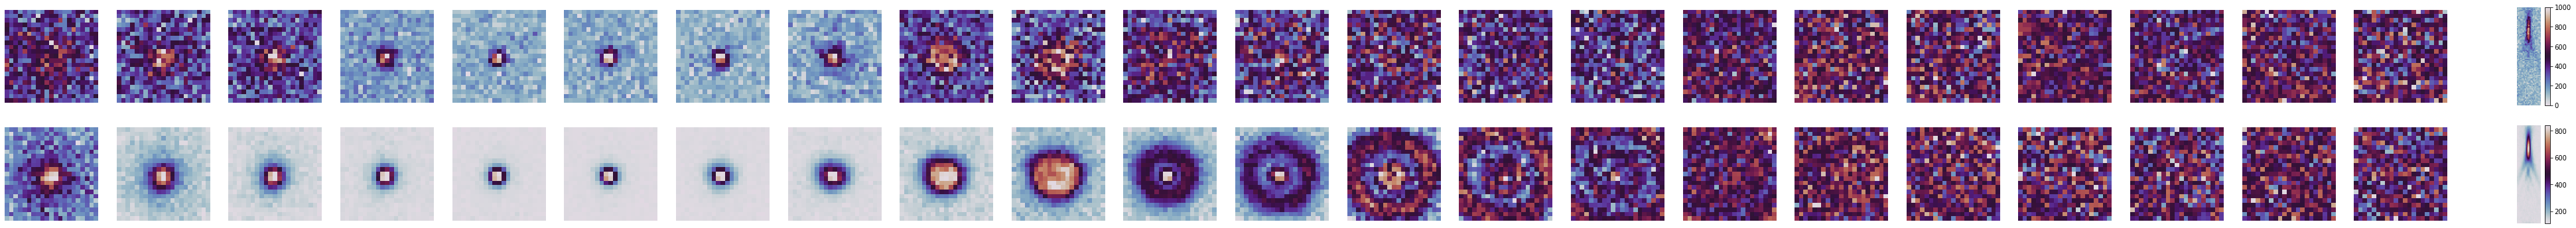

channel 2


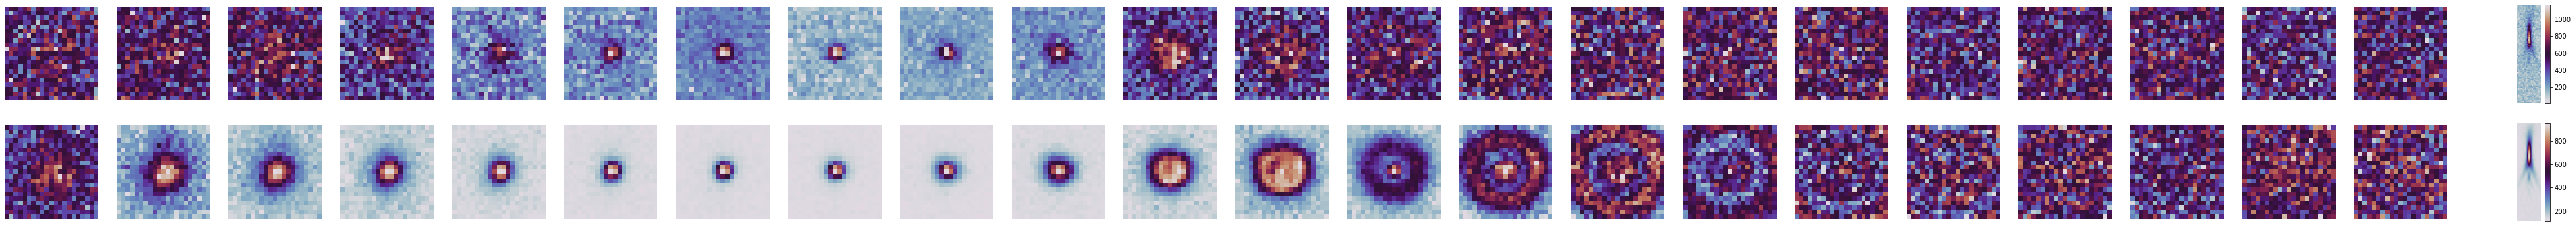

channel 3


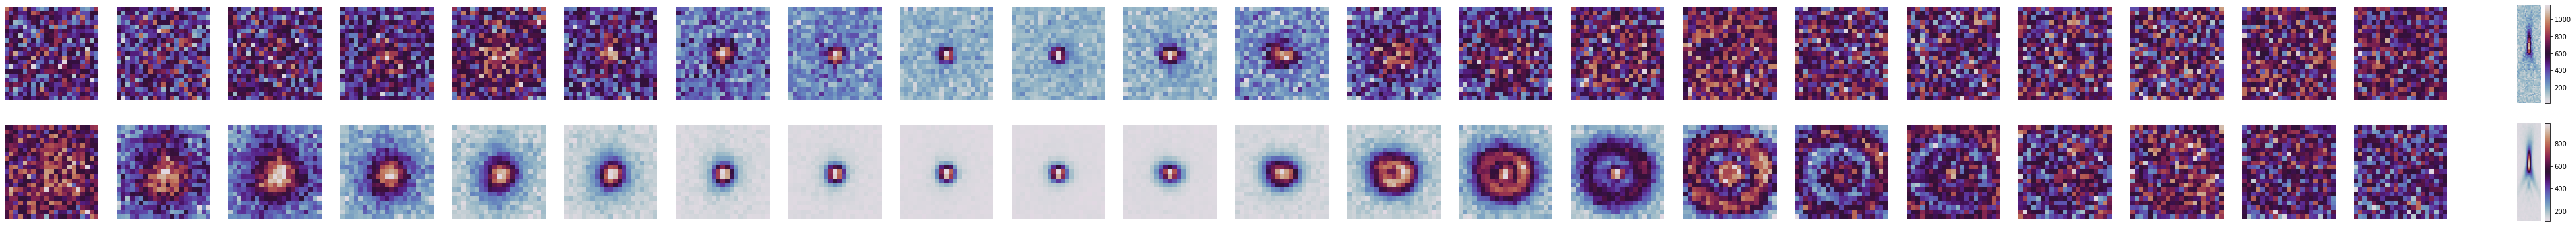

channel 4


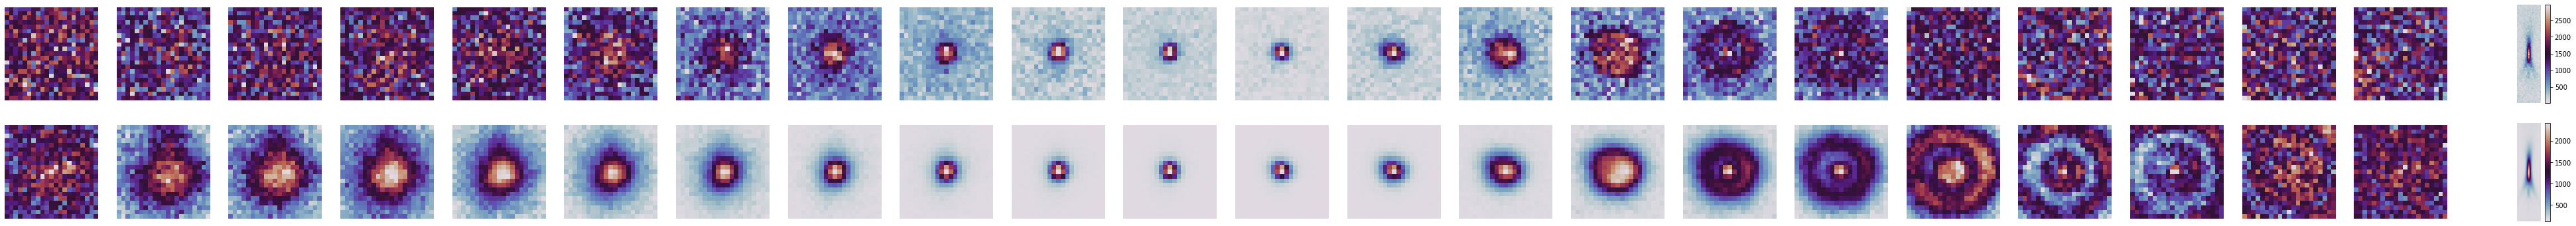

channel 5


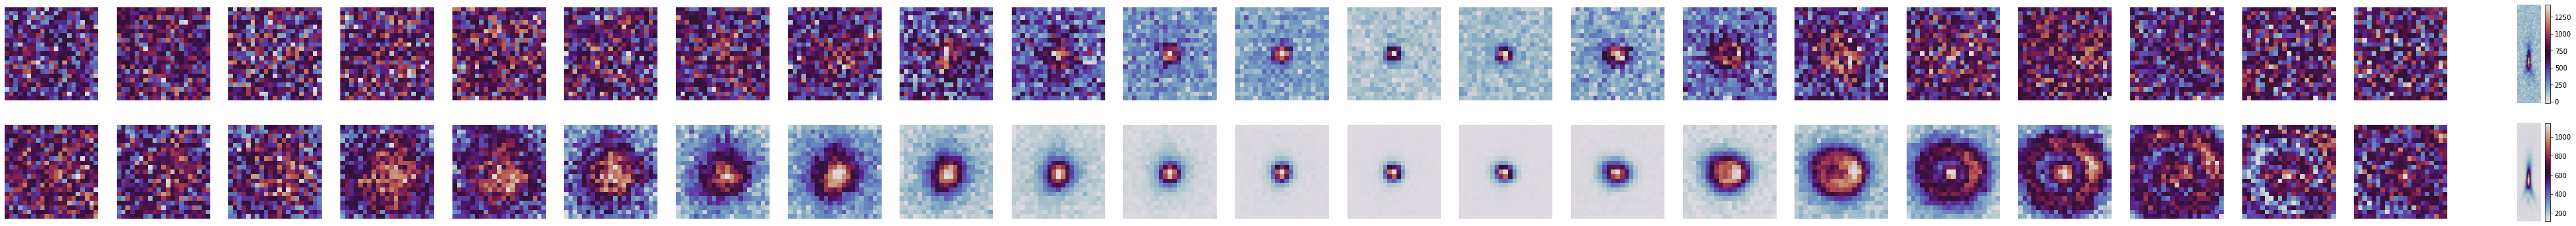

channel 6


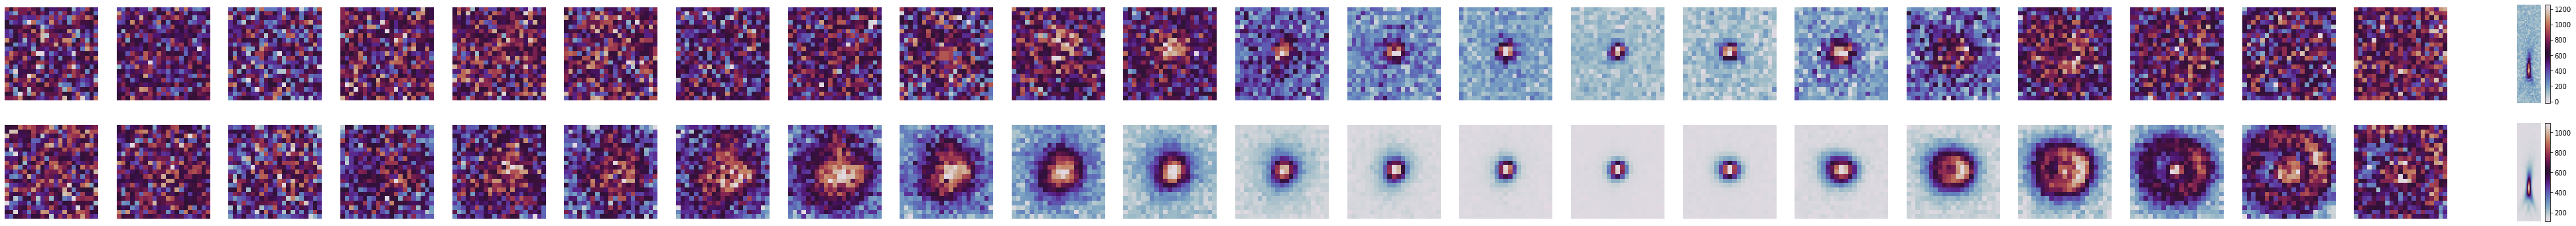

channel 7


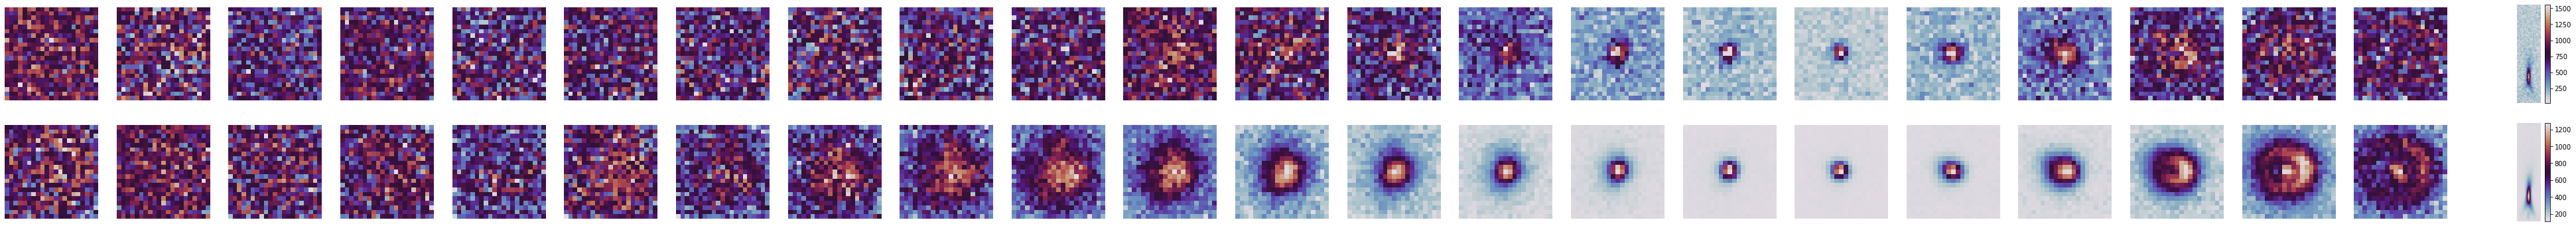

channel 8


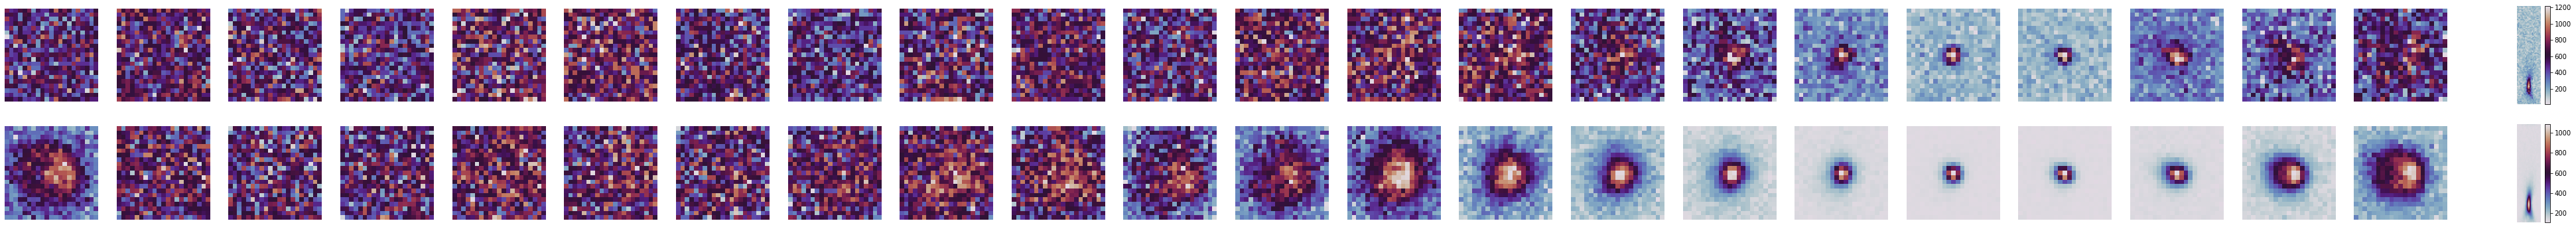

In [8]:
showpsfvsdata(f,p,index=0)

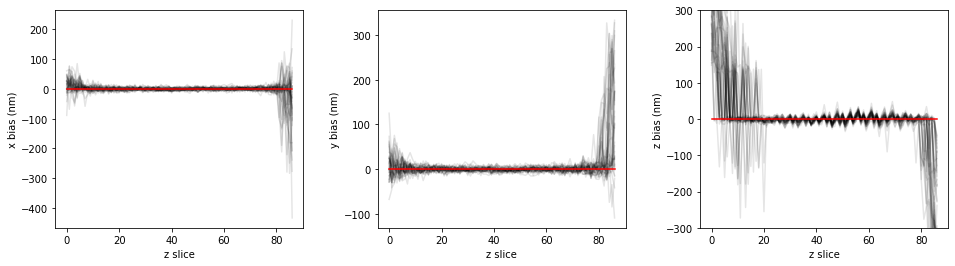

In [9]:
showlocalization(f,p)

##### Optional plots

In [ ]:
try:
    showpupil(f,p)
except:
    print('no pupil')

In [ ]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[[ 0.9997 -0.0011 -0.    ]
  [-0.0027  0.9998  0.    ]
  [ 0.6495  5.2805  1.    ]]

 [[ 0.9991 -0.0021 -0.    ]
  [-0.0053  1.0002  0.    ]
  [ 2.0376 10.8637  1.    ]]

 [[ 0.9956 -0.0003 -0.    ]
  [ 0.0001  0.998   0.    ]
  [ 6.1993 -1.0469  1.    ]]

 [[ 0.9962 -0.0007 -0.    ]
  [-0.0026  0.9988  0.    ]
  [ 6.7161  3.6872  1.    ]]

 [[ 0.9951 -0.0016 -0.    ]
  [-0.0047  0.999   0.    ]
  [ 8.3559  8.6782  1.    ]]

 [[ 0.9917 -0.0002 -0.    ]
  [-0.0003  0.9979  0.    ]
  [13.1206 -3.1013  1.    ]]

 [[ 0.9912 -0.0006 -0.    ]
  [-0.0021  0.9975  0.    ]
  [13.5362  1.6891  1.    ]]

 [[ 0.9904 -0.0011 -0.    ]
  [-0.0043  0.9973  0.    ]
  [15.029   6.868   1.    ]]]


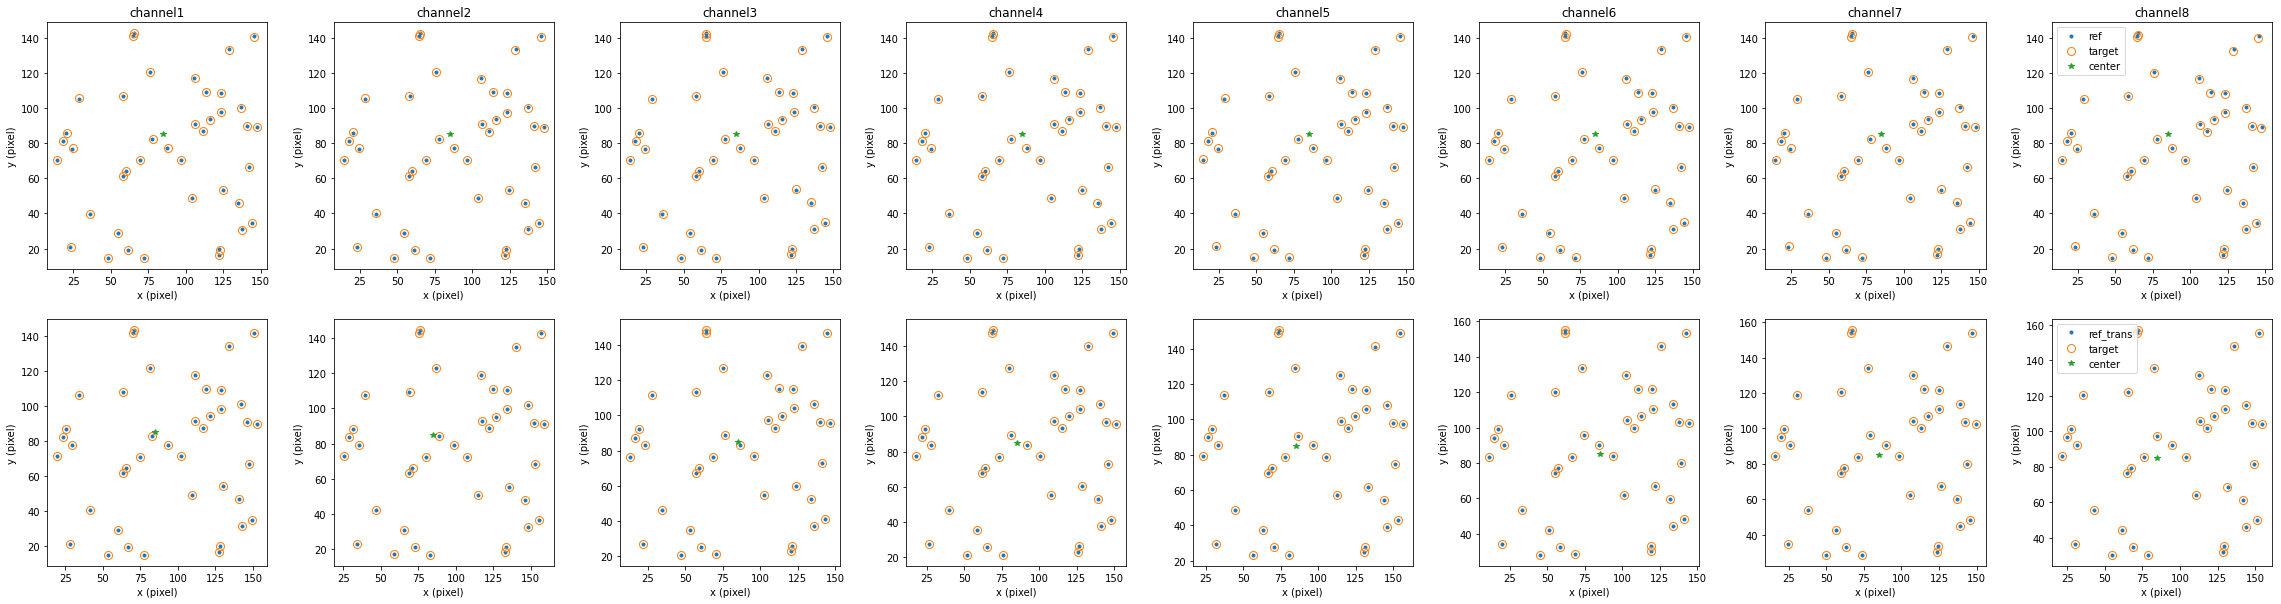

In [10]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

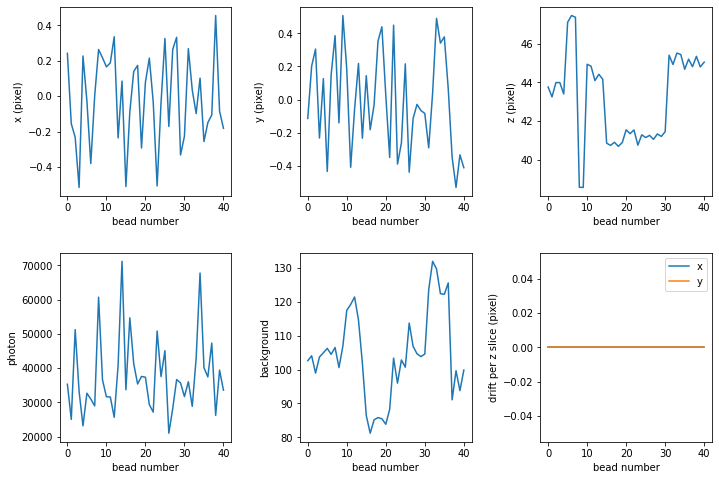

In [11]:
showlearnedparam(f,p)

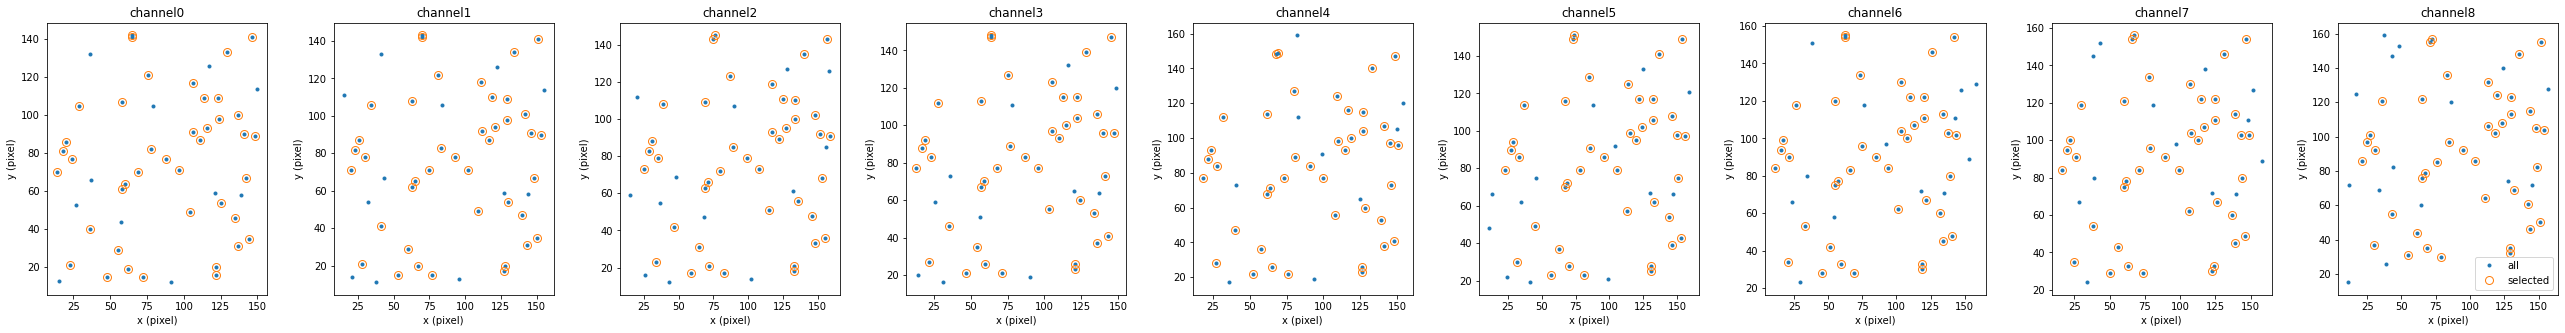

In [12]:
showcoord(f,p)